In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import mplfinance as mpf

In [2]:
# importing data set 
df=pd.read_csv(r"G:\Tutors club internship\itc.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-21,214.000000,215.449997,211.050003,212.500000,202.940292,19395604
1,2021-12-22,214.000000,214.199997,211.100006,212.000000,202.462799,17239484
2,2021-12-23,213.899994,218.449997,213.199997,217.300003,207.524368,22209720
3,2021-12-24,218.000000,220.449997,216.449997,218.000000,208.192871,16581585
4,2021-12-27,218.399994,218.449997,215.649994,217.550003,207.763123,8153106


In [4]:
# converting to date time format
df["Date"] = pd.to_datetime(df["Date"])
df.set_index('Date',inplace=True)


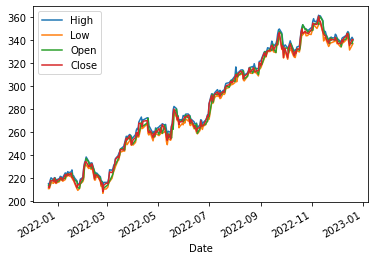

In [5]:
# Plot the high, low, open, and close values
df[["High", "Low", "Open", "Close"]].plot()

# Show the plot
plt.show()

In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-21,214.000000,215.449997,211.050003,212.500000,202.940292,19395604
2021-12-22,214.000000,214.199997,211.100006,212.000000,202.462799,17239484
2021-12-23,213.899994,218.449997,213.199997,217.300003,207.524368,22209720
2021-12-24,218.000000,220.449997,216.449997,218.000000,208.192871,16581585
2021-12-27,218.399994,218.449997,215.649994,217.550003,207.763123,8153106
...,...,...,...,...,...,...
2022-12-14,346.000000,347.350006,343.750000,345.399994,345.399994,7379878
2022-12-15,344.750000,346.100006,338.000000,338.850006,338.850006,8154931
2022-12-16,337.500000,338.899994,331.299988,335.100006,335.100006,12429280


In [7]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
data

,Close
Date,
2021-12-21,212.500000
2021-12-22,212.000000
2021-12-23,217.300003
2021-12-24,218.000000
2021-12-27,217.550003
...,...
2022-12-14,345.399994
2022-12-15,338.850006
2022-12-16,335.100006


In [8]:
data['shifting_close']=data["Close"].shift(+1)
data

,Close,shifting_close
Date,,
2021-12-21,212.500000,NaN
2021-12-22,212.000000,212.500000
2021-12-23,217.300003,212.000000
2021-12-24,218.000000,217.300003
2021-12-27,217.550003,218.000000
...,...,...
2022-12-14,345.399994,345.600006
2022-12-15,338.850006,345.399994
2022-12-16,335.100006,338.850006


In [9]:
data=data.dropna()
data

,Close,shifting_close
Date,,
2021-12-22,212.000000,212.500000
2021-12-23,217.300003,212.000000
2021-12-24,218.000000,217.300003
2021-12-27,217.550003,218.000000
2021-12-28,220.050003,217.550003
...,...,...
2022-12-14,345.399994,345.600006
2022-12-15,338.850006,345.399994
2022-12-16,335.100006,338.850006


In [10]:
from sklearn.linear_model import LinearRegression 
lin_model=LinearRegression()


In [11]:
x=data['shifting_close']
y=data["Close"]
x,y=np.array(x),np.array(y)
x,y=x.reshape(-1,1),y.reshape(-1,1)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=x[:-50],x[-50:],y[:-50],y[-50:]

In [13]:
lin_model.fit(x_train,y_train)

LinearRegression()

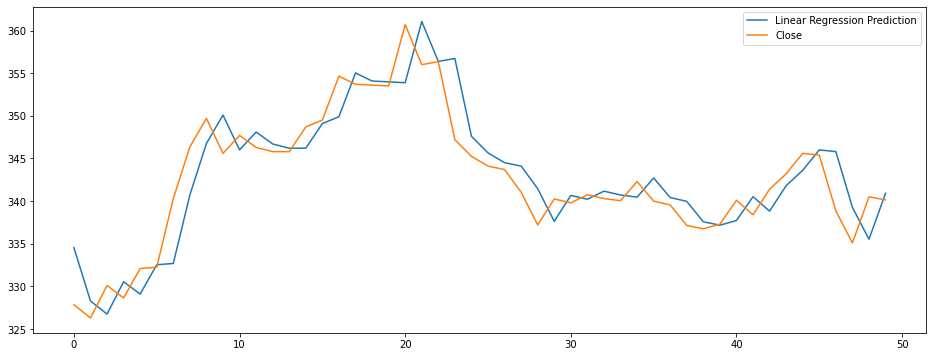

In [14]:
pred=lin_model.predict(x_test)
plt.figure(figsize=(16,6))
plt.plot(pred,label='Linear Regression Prediction')
plt.plot(y_test,label='Close')
plt.legend(loc="upper right")
plt.show()


In [15]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((pred - y_test) ** 2)))
rmse

3.381273221009805